# Solutions 1

# 1. Basic plotting with matplotlib

In our first example, we plot a simple curve with matplotlib.

## a) Generating set of data

First we need to create an array of our x values for the curve to plot.

Import basic libraries:

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def equallySpacedNumbers(start, end, number):
    return np.linspace(start, end, number)
    
# look at the function output by printing:
print(equallySpacedNumbers(2.0, 3.0, 4))

print(all(equallySpacedNumbers(2.0,10.0,9) 
          == [2.,3.,4.,5.,6.,7.,8.,9.,10.]))
print(all(abs(equallySpacedNumbers(-1.2,0.2,6) 
              - [-1.2,-0.92,-0.64,-0.36,-0.08,0.2]) < 1e-6))


[2.         2.33333333 2.66666667 3.        ]
True
True


There is also **np.arange**, which has step size parameter instead of number of entries, be aware of rounding errors having unwanted influencing on array length, see examples below
(therefore: in most cases better use np.linspace)

In [3]:
print(np.arange(1, 1.1, 0.1))
print(np.arange(1, 1.2, 0.1))
print(np.arange(1, 1.3, 0.1))
print(np.arange(1, 1.4, 0.1))
print(np.arange(1, 1.5, 0.1))
print(np.arange(1, 1.6, 0.1))
print(np.arange(1, 1.7, 0.1))

[1.  1.1]
[1.  1.1]
[1.  1.1 1.2 1.3]
[1.  1.1 1.2 1.3]
[1.  1.1 1.2 1.3 1.4]
[1.  1.1 1.2 1.3 1.4 1.5 1.6]
[1.  1.1 1.2 1.3 1.4 1.5 1.6]


### b) Simple plots

As example, we now want to make a plot of the fall time vs. the height of which an apple is dropped. For both x and y we need one-dimensional numpy arrays of the same length.
  

You find some help on basic plot functionalities here:  
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
  
For more special plots, first have a look in the gallery:  
https://matplotlib.org/gallery/index.html  
which already includes many common types of plots.

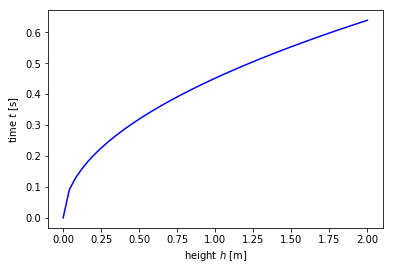

In [4]:
def Falltime(x, g):
    return np.sqrt(2*x/g)

# create a dataset
true_g = 9.8
data_x = equallySpacedNumbers(0.0,2.0,50)
data_y = Falltime(data_x, true_g)

# the simplest way to plot
plt.plot(data_x, data_y,color='blue',label='theory')

# always label the axes (use r'$...$' for latex style)
plt.xlabel(r'height $h$ [m]')
plt.ylabel(r'time $t$ [s]')

# make the plot appear
plt.show()

### c) Import measurements from text file

In [5]:
# load data from textfile
# format: height time height_error time_error
measurements = np.loadtxt('measurement.txt')

# look at it
print("shape:", measurements.shape, "\n")
print("data:\n", measurements, "\n")
print("first column:", measurements[:, 0], "\n")
print("last row, first two columns:", measurements[-1,0:2])


shape: (10, 4) 

data:
 [[0.49805377 0.3304071  0.01       0.05      ]
 [0.67623611 0.28373072 0.01       0.05      ]
 [0.80522924 0.44070176 0.01       0.05      ]
 [0.97044345 0.49827658 0.01       0.05      ]
 [1.12945511 0.45374148 0.01       0.05      ]
 [1.28508361 0.52819172 0.01       0.05      ]
 [1.43542144 0.64219285 0.01       0.05      ]
 [1.59138769 0.60636401 0.01       0.05      ]
 [1.72742522 0.59992293 0.01       0.05      ]
 [1.89783378 0.55806461 0.01       0.05      ]] 

first column: [0.49805377 0.67623611 0.80522924 0.97044345 1.12945511 1.28508361
 1.43542144 1.59138769 1.72742522 1.89783378] 

last row, first two columns: [1.89783378 0.55806461]


We have seen that **np.loadtxt** conveniently loads text files into numpy arrays. There is also a **np.savetxt** function to do the opposite, see solution for part **f)**.

### d) Plot with error bars

Now we want to plot the measurement data (from the text file) with error bars together with the prediction from theory. In many cases there is a non-negligible uncertainty also on the theoretical prediction. One way of visualizing this is to plot an error band, which in practice can be done by shading the area between two curves.  
In this example, use $\sigma_g = 0.4 \frac{\text{m}}{\text{s}^2}$ as the uncertainty of $g$.  
  
There are examples of plots with error bars in the gallery linked above. For more detailed options look at the reference here:  
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

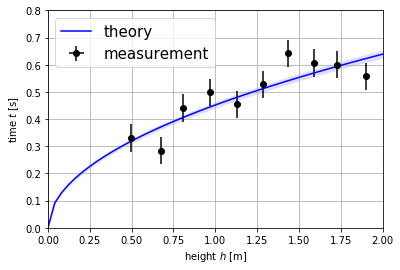

In [6]:
# create an additional dataset for the uncertainty band
data_y_m = Falltime(data_x, true_g - 0.4)
data_y_p = Falltime(data_x, true_g + 0.4)

# plot uncertainty band of theory prediction
plt.fill_between(data_x, data_y_m, data_y_p, facecolor='#ddddff', color='#ddddff')

# plot mean value on top
plt.plot(data_x, data_y, color='blue', label='theory')

# always label the axes (the r'$...$' make the axes have a latex style)
plt.xlabel(r'height $h$ [m]')
plt.ylabel(r'time $t$ [s]')

# plot measurement with errors
plt.errorbar(
    measurements[:,0], measurements[:,1], 
    xerr=measurements[:,2], yerr=measurements[:,3], 
    marker='o', color='black', label='measurement', linestyle='none'
)

# legend
plt.legend(loc='upper left',fontsize='15', numpoints=1)

# optional: set axis limits
plt.xlim([0,2.0])
plt.ylim([0,0.8])

# optional: grid lines
plt.grid(True)

# save the figure to a pdf file
plt.savefig('exercise-1-plot.pdf')

# make the plot appear
plt.show()

### e) Histograms

A qualitative way to check compatibility of the measurement points with theory is to make a histogram of the pulls (pulls are defined below in the code). Create the histogram of pulls and overlay the expected pull distribution, which is Gaussian.  
  
Instead of putting the formula for the Gaussian yourself, you can use `scipy.stats.norm.pdf`, see here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


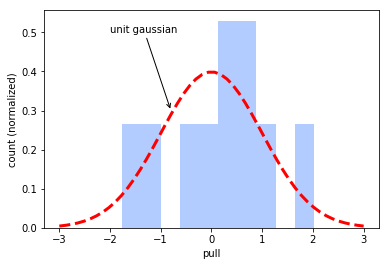

In [7]:
import scipy.stats

heights = measurements[:, 0]
times = measurements[:, 1]
time_errors = measurements[:, 3]
predictions = Falltime(heights, true_g)

# compute pulls
pulls = (times - predictions)/time_errors

# histogram of pulls
plt.hist(pulls, 10, density=1, 
         histtype='stepfilled', facecolor='#99bbff', alpha=0.75)

# unit gaussian
x = np.linspace(-3.0, 3.0, 50)
plt.plot(x, scipy.stats.norm.pdf(x, 0.0, 1.0), '--', color='r', linewidth=3.0)

# always label the axes, also for histograms
plt.xlabel(r'pull')
plt.ylabel(r'count (normalized)')

# annotation
plt.annotate('unit gaussian', xy=(-0.8, 0.3), 
             arrowprops=dict(arrowstyle='->'), xytext=(-2, 0.5))
    
# save the figure to a pdf file
plt.savefig('exercise-1-histogram.pdf')

plt.show()

### f) (optional) Creating a text file of toy measurements

In [8]:
# create toy experiments instead of real measurements here
n_toys = 1000
toy_true_height = equallySpacedNumbers(0.5, 1.9, n_toys)
toy_true_time   = Falltime(toy_true_height, true_g)

# uncertainty on measurements
height_uncertainty = 0.01
time_uncertainty   = 0.05

# toy with uncertainties, sample from normal distribution
toy_height = toy_true_height + np.random.normal(0, height_uncertainty, n_toys)
toy_time   = toy_true_time   + np.random.normal(0, time_uncertainty,   n_toys)

# error bars for plotting
toy_height_errors = np.full(n_toys, height_uncertainty)
toy_time_errors   = np.full(n_toys, time_uncertainty)

# save to text file
np.savetxt('measurement_%dtoys.txt'%n_toys, 
           np.transpose([toy_height, toy_time, 
                         toy_height_errors, toy_time_errors]))


# 2. Error propagation with Python

We consider a LC circuit with resonance frequency $\omega_0 = \frac{1}{\sqrt{LC}}$.  
$C = 150 \pm 8 \,\text{pF}$  
$L = 1 \pm 0.1 \,\text{mH}$  
  
What is the resonance frequency and its uncertainty? 


## a) Calculation by hand

The mean value is computed to:   
  
$\omega_0 = \frac{1}{\sqrt{LC}} = 2.58 \cdot 10^6 \,\frac{1}{\text{s}}$  
  
Since the uncertainties for both quantities come from independent electronic components, they can safely be assumed as uncorrelated and one can compute the uncertainty of $\omega_0$ to  
$\sigma_{\omega_0} = \sqrt{\left(\frac{\partial \omega_0}{\partial C} \sigma_C\right)^2 + \left(\frac{\partial \omega_0}{\partial L} \sigma_L\right)^2 } = 1.46 \cdot 10^5\,\frac{1}{\text{s}}$

## b) Installation of 'uncertainties' package

There are packages, which make handling of uncertainties very easy, e.g. the package simply called "uncertainties". It is not included in standard packages of Anaconda and therefore has to be installed with:  
`conda install -c conda-forge uncertainties`  
This can take several minutes, since anaconda has to resolve a lot of dependencies.  
(If you are annoyed by the slowness of anaconda, look at "pip" which is a conceptually different way of installing Python modules)

## c) Use of 'uncertainites' package

Look at the example on the official website on how to use the library:  
https://pythonhosted.org/uncertainties/  
  
Define $L$ and $C$ as `ufloat`s and compute the resonance frequency and print the result.  
How can one obtain the central value and the uncertainty separately from the `ufloat` object?

In [9]:
from uncertainties import ufloat
from uncertainties.umath import *

C = ufloat(150e-12, 8e-12)
L = ufloat(1e-3, 0.1e-3)

omega0 = 1/sqrt(L*C)
print(omega0)
print("nominal:",omega0.n)
print("standard deviation:", omega0.s)

(2.58+/-0.15)e+06
nominal: 2581988.8974716114
standard deviation: 146312.704190058


Note that the uncertainties package treats correlations correctly (if you tell it about them).

In [10]:
C2 = ufloat(150e-12, 8e-12)
C3 = C2
print("correlated:", (C3-C2).s)
print("uncorrelated:",(C3-C).s)

correlated: 0.0
uncorrelated: 1.131370849898476e-11


There's lots of things you can do to plots. Have a look here for more inspiration: https://matplotlib.org/gallery.html

## d) (optional) write your own uncertainty package

We can also try to write our own class for propagating uncertainties. Look at the myufloat class below and add the missing pieces marked with **TODO:**. Then test your **myufloat** class with the LC circuit example from above. It should lead to the same result (up to floating point rounding errors).

In [11]:
class myufloat:
    def __init__(self, n, s=0.0):
        self.n = float(n)
        self.s = float(s)
    
    def __add__(self, operand):
        n = self.n + operand.n
        s = np.sqrt(self.s * self.s + operand.s * operand.s)
        return myufloat(n, s)

    def __sub__(self, operand):
        n = self.n - operand.n
        s = np.sqrt(self.s * self.s + operand.s * operand.s)
        return myufloat(n, s)
    
    def __mul__(self, operand):
        n = self.n * operand.n
        r1 = self.s / self.n
        r2 = operand.s / operand.n
        s = np.abs(n) * np.sqrt(r1*r1 + r2*r2)
        return myufloat(n, s)
    
    def __div__(self, operand):
        n = self.n / operand.n
        r1 = self.s / self.n
        r2 = operand.s / operand.n
        s = np.abs(n) * np.sqrt(r1*r1 + r2*r2)
        return myufloat(n, s)
    
    # for Python3
    def __truediv__(self, operand):
        return self.__div__(operand)

    def sqrt(self):
        return myufloat(np.sqrt(self.n), np.abs(0.5/np.sqrt(self.n)*self.s))
    
    def __str__(self):
        return "%1.2e ± %1.2e"%(self.n, self.s)
    
    def __repr__(self):
        return "%1.2e ± %1.2e"%(self.n, self.s)
    

In [12]:
C = myufloat(150e-12, 8e-12)
L = myufloat(1e-3, 0.1e-3)

print(myufloat(1.0)/np.sqrt(C*L))

2.58e+06 ± 1.46e+05


So the results agree for this case!
Lets check some other cases:  
create two values with uncertainties:  
  
$a = 1.0 \pm 0.1$  
$b = 2.0 \pm 0.05$  
  
and compute the result including uncertainty both with the uncertainties package (ufloat) and your own implementation (using myufloat) of:  
  
$c = \frac{a+b}{a-b}$  
  
are they the same? If not, why?

In [13]:
a1 = ufloat(1.0, 0.1)
b1 = ufloat(2.0, 0.05)

a2 = myufloat(1.0, 0.1)
b2 = myufloat(2.0, 0.05)

c1 = (a1+b1)/(a1-b1)
c2 = (a2+b2)/(a2-b2)

print(c1)
print(c2)


-3.0+/-0.4
-3.00e+00 ± 3.54e-01


We neglected correlations in our **myufloat** class that e.g. the **a** in the numerator and the **a** in the denominator are the same and therefore 100% correlated! The uncertainties package takes this into account.